# Project 2 for Introduction Of Neural Networks Subject (2023.1)

## Name: Gabriel Vicente Rodrigues
## NUSP: 11795377
## Email: gabriel_vr@usp.br

The objective of this project is to compare a simple model of convolutional neural networks in noisy images. The databases used are CIFAR-10 and SVHN.

The project is divide into 5 questions, each one inteded to explore a specific topic of CNNs.

## Initial Configurations

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds
import scipy.io as scio
import skimage.util
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
path = '/content/drive/MyDrive/Faculdade/2023.1/Redes Neurais/Trabalhos/2/'

## Question 1

### Create a CNN using Keras with the following configuration:

input 32X32X3 ->

Conv2D: 16 neurônios (filters), kernels 3x3, ReLU ->

MaxPooling2D: pool 2x2 ->

Conv2D: 16 neurônios (filters), kernels 3x3, ReLU ->

Conv2D: 16 neurônios (filters), kernels 3x3, ReLU ->

MaxPooling2D: pool 2x2 ->

Conv2D: 32 neurônios (filters), kernels 3x3, ReLU ->

Conv2D: 32 neurônios (filters), kernels 3x3, ReLU ->

MaxPooling2D: pool 2x2 ->

Dense: 10 neurônios

In [6]:
def createModel():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=3,
        activation='relu',
        padding='same',
        input_shape=(32, 32, 3)
        ),
        tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        ),
        ##############################
        tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=3,
        activation='relu',
        padding='same'
        ),
        tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=3,
        activation='relu',
        padding='same'
        ),
        tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        ),
        ############################
        tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu',
        padding='same'
        ),
        tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu',
        padding='same'
        ),
        tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
    )
    return model

## Question 2

Load both CIFAR-10 and SVHN databases.

In [7]:
(X_train_cifar10, y_train_cifar10), (X_test_cifar10, y_test_cifar10) = tf.keras.datasets.cifar10.load_data()

X_test_cifar10 = np.float16(X_test_cifar10)
X_train_cifar10 = np.float16(X_train_cifar10)

y_train_cifar10 = np.uint8(y_train_cifar10)
y_train_cifar10 = np.uint8(y_train_cifar10)

170498071/170498071 [==============================] - 2s 0us/step


In [8]:
print(X_test_cifar10.shape)
print(X_train_cifar10.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [9]:
train_SVHN = scio.loadmat(path +'train_32x32.mat')
test_SVHN = scio.loadmat( path +'test_32x32.mat')

In [10]:
X_train_SVHN = train_SVHN['X']
X_test_SVHN = test_SVHN['X']



In [11]:
y_train_SVHN = train_SVHN['y']
y_test_SVHN = test_SVHN['y']

In [12]:
X_test_SVHN = np.float16(X_test_SVHN)
X_train_SVHN = np.float16(X_train_SVHN)

y_train_SVHN = np.uint8(y_train_SVHN)
y_test_SVHN = np.uint8(y_test_SVHN)

In [13]:
print(X_train_SVHN.shape)
print(X_test_SVHN.shape)
print(y_train_SVHN.shape)
print(y_test_SVHN.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)
(73257, 1)
(26032, 1)


###  a) Transform y_train and y_test of CIFAR-10 and SVHN in categorical

In [14]:

y_test_cifar10 = tf.keras.utils.to_categorical(y_test_cifar10, dtype=np.uint8)
y_train_cifar10 = tf.keras.utils.to_categorical(y_train_cifar10, dtype=np.uint8)

y_test_SVHN = tf.keras.utils.to_categorical(y_test_SVHN, dtype=np.uint8)
y_train_SVHN = tf.keras.utils.to_categorical(y_train_SVHN, dtype=np.uint8)

In [15]:
# this column is deleted because the to_categorical function creates 11 columns
# even though there are only 10 classes. It is because the labels start from 1 instead of 0
y_test_SVHN = np.delete(y_test_SVHN, 0, 1)
y_train_SVHN = np.delete(y_train_SVHN, 0, 1)

In [16]:
print(y_test_cifar10.shape)
print(y_train_cifar10.shape)
print(y_test_SVHN.shape)
print(y_train_SVHN.shape)

(10000, 10)
(50000, 10)
(26032, 10)
(73257, 10)


### b) Transform X_train and X_test from SVHN into arrays that can be used by Keras

In [17]:
X_test_SVHN = np.transpose(X_test_SVHN, (3, 0, 1, 2))
X_train_SVHN = np.transpose(X_train_SVHN, (3, 0, 1, 2))
X_test_SVHN.shape

(26032, 32, 32, 3)

### c) Normalize the pixels of images into [0, 1]

In [18]:
def normalize(X):
    return X/255.0

In [19]:
X_test_SVHN = normalize(X_test_SVHN)
X_train_SVHN = normalize(X_train_SVHN)
X_test_cifar10 = normalize(X_test_cifar10)
X_train_cifar10 = normalize(X_train_cifar10)

### d) For each dataset, compute the number of images in train and test, the dimension of the images and the class ditribution

In [51]:
n_images_train_cifar10 = X_train_cifar10.shape[0]
n_images_test_cifar10 = X_test_cifar10.shape[0]
n_images_test_SVHN = X_test_SVHN.shape[0]
n_images_train_SVHN = X_train_SVHN.shape[0]

dimension_train_cifar10_image = X_train_cifar10.shape[1:]
dimension_test_cifar10_image = X_test_cifar10.shape[1:]
dimension_test_SVHN_image = X_test_SVHN.shape[1:]
dimension_train_SVHN_image = X_train_SVHN.shape[1:]

print("Number of images cifar10 train: {}\n".format(n_images_train_cifar10))
print("Number of images cifar10 test: {}\n".format(n_images_test_cifar10))
print("Number of images SVHN train: {}\n".format(n_images_train_SVHN))
print("Number of images SVHN test: {}\n".format(n_images_test_SVHN))

print("Dimension of images cifar10 train: {}\n".format(dimension_train_cifar10_image))
print("Dimension of images cifar10 test: {}\n".format(dimension_test_cifar10_image))
print("Dimension of images SVHN train: {}\n".format(dimension_train_SVHN_image))
print("Dimension of images SVHN test: {}\n".format(dimension_test_SVHN_image))



Number of images cifar10 train: 50000

Number of images cifar10 test: 10000

Number of images SVHN train: 73257

Number of images SVHN test: 26032

Dimension of images cifar10 train: (32, 32, 3)

Dimension of images cifar10 test: (32, 32, 3)

Dimension of images SVHN train: (32, 32, 3)

Dimension of images SVHN test: (32, 32, 3)



[Text(0.5, 1.0, 'Distribuição das classes do dataset cifar 10 de teste')]

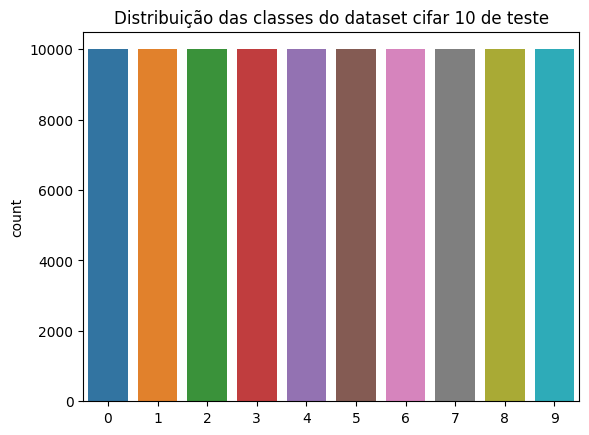

In [22]:
sns.countplot(y_test_cifar10).set(title="Distribuição das classes do dataset cifar 10 de teste")

[Text(0.5, 1.0, 'Distribuição das classes do dataset cifar 10 de treino')]

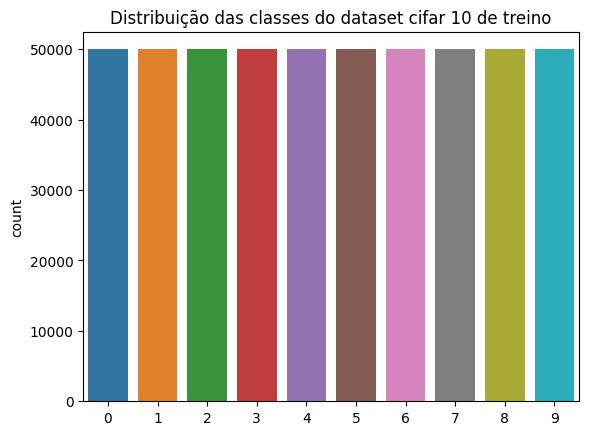

In [23]:
sns.countplot(y_train_cifar10).set(title="Distribuição das classes do dataset cifar 10 de treino")


[Text(0.5, 1.0, 'Distribuição das classes do dataset SVHN de teste')]

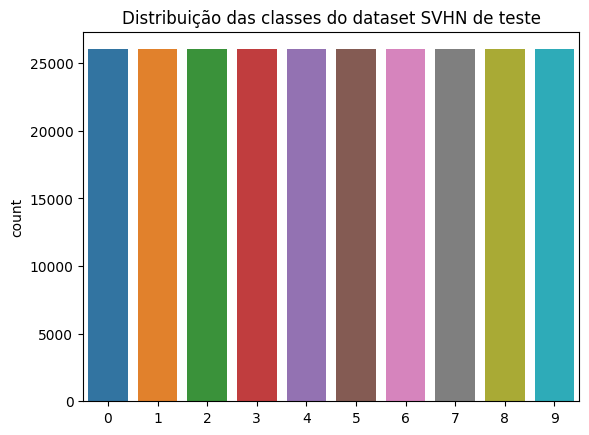

In [24]:
sns.countplot(y_test_SVHN).set(title="Distribuição das classes do dataset SVHN de teste")


[Text(0.5, 1.0, 'Distribuição das classes do dataset cifar 10 de treino')]

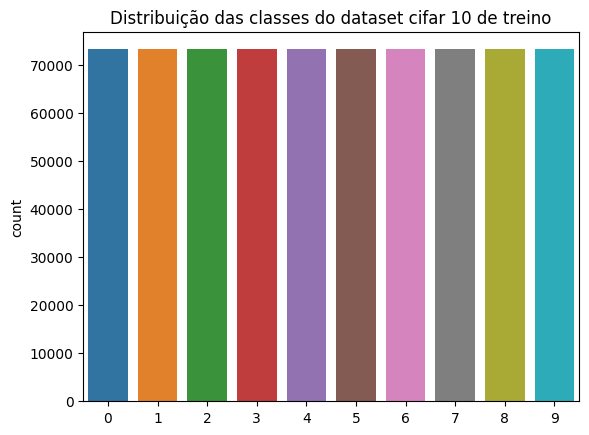

In [25]:
sns.countplot(y_train_SVHN).set(title="Distribuição das classes do dataset cifar 10 de treino")


## Question 3

### a) Generate noisy images with gaussian ditribution with variances of 0.001 and 0.01

In [26]:
noise_variances = [0.001, 0.01]

cifar10_train_datasets = [X_train_cifar10]
cifar10_test_datasets = [X_test_cifar10]
SVHN_train_datasets = [X_train_SVHN]
SVHN_test_datasets = [X_test_SVHN]

for variance in noise_variances:
    cifar10_train_datasets.append( skimage.util.random_noise(X_train_cifar10, mode='gaussian', var=variance).astype(np.float16))
    cifar10_test_datasets.append( skimage.util.random_noise(X_test_cifar10, mode='gaussian', var=variance).astype(np.float16))
    SVHN_train_datasets.append( skimage.util.random_noise(X_train_SVHN, mode='gaussian', var=variance).astype(np.float16))
    SVHN_test_datasets.append( skimage.util.random_noise(X_test_SVHN, mode='gaussian', var=variance).astype(np.float16))

### b) Show an image of each class in the three versions (normal, noisy 0.001 and noisy 0.01) for both datasets

In [27]:
def pltImagesAxLine(images: np.ndarray, axsLine: np.ndarray, labelImages: list):
    for img, ax, label in zip(images, axsLine, labelImages):
        ax.axis('off')
        ax.set_title(label)
        ax.imshow(img[0].astype(np.float64))

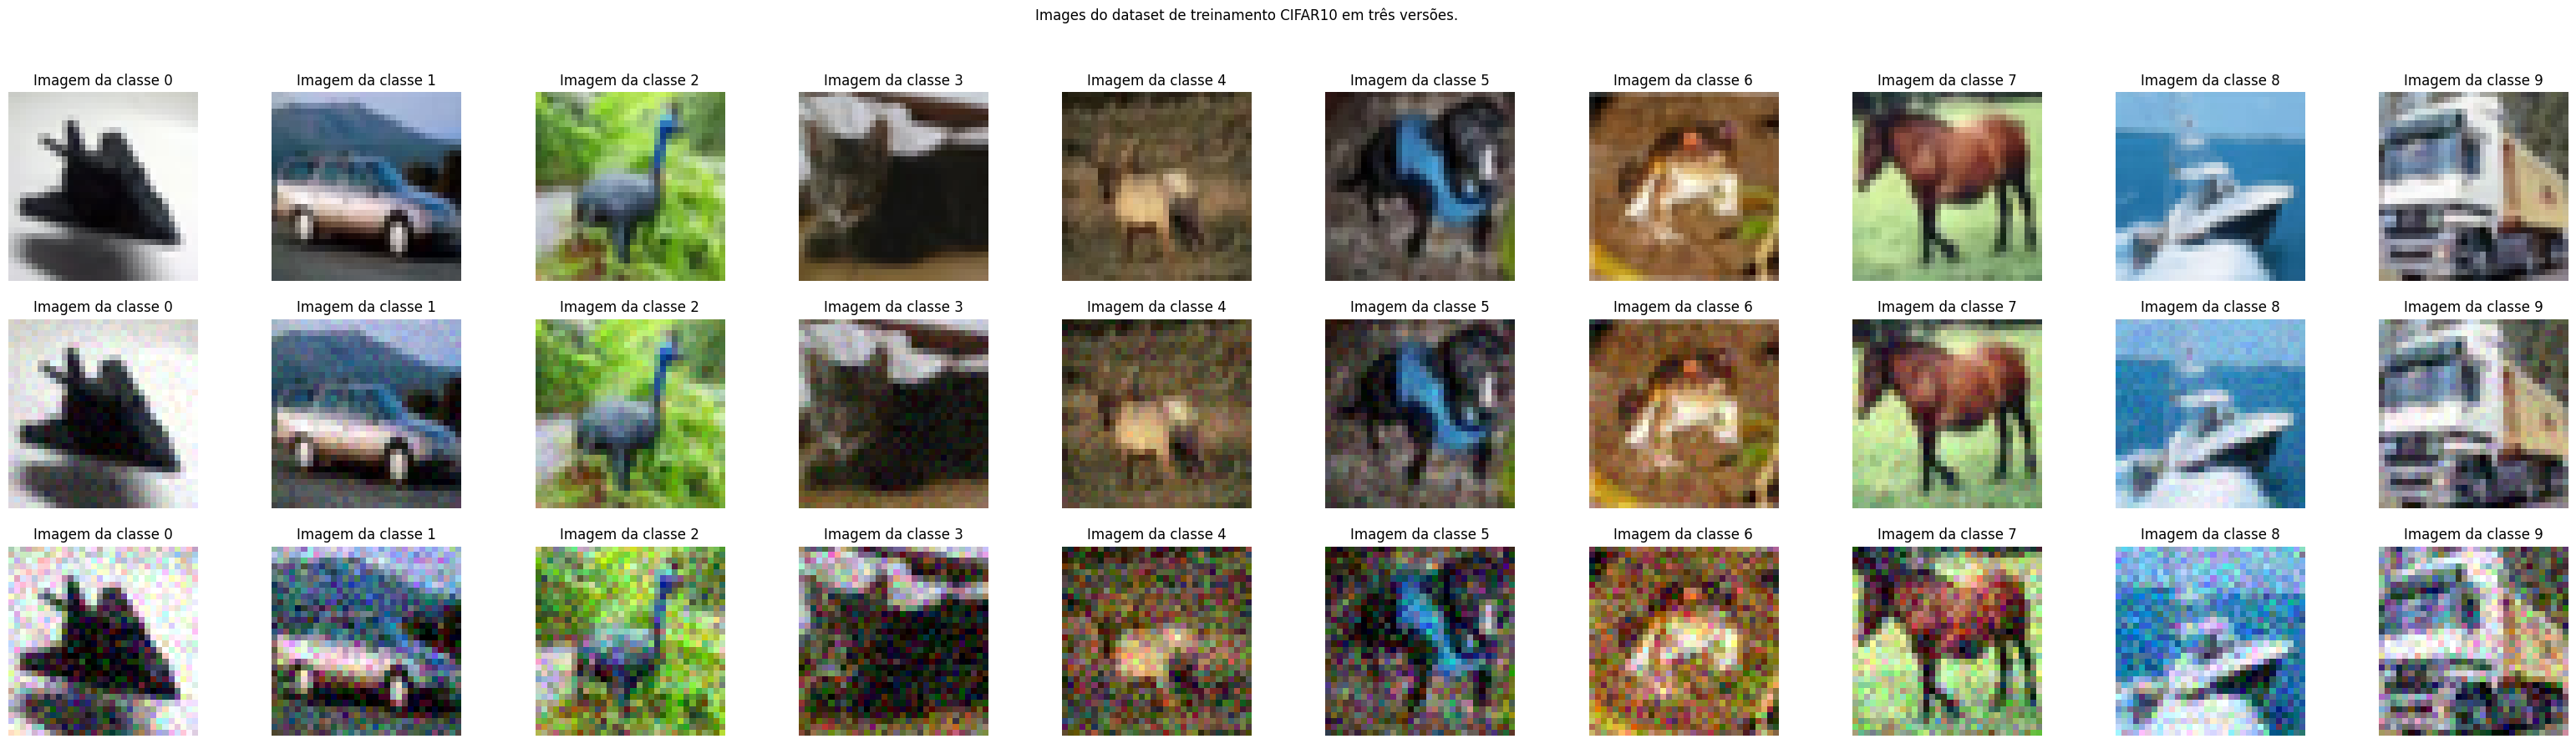

In [28]:
fig, axs = plt.subplots(3, 10, figsize=(40, 10))
fig.suptitle('Images do dataset de treinamento CIFAR10 em três versões.')



for dataset, ax in zip(cifar10_train_datasets, axs):
  images = []
  labels = []
  for i in range(y_train_cifar10.shape[1]):
    looked_image_prob = np.zeros((y_train_cifar10.shape[1]), dtype=np.uint8)
    looked_image_prob[i] = 1
    idx = np.argwhere(np.all(y_train_cifar10 == looked_image_prob, axis=1))
    images.append(dataset[idx[0]])
    labels.append("Imagem da classe {}".format(i))

  pltImagesAxLine(images, ax, labels)



(73257, 10)


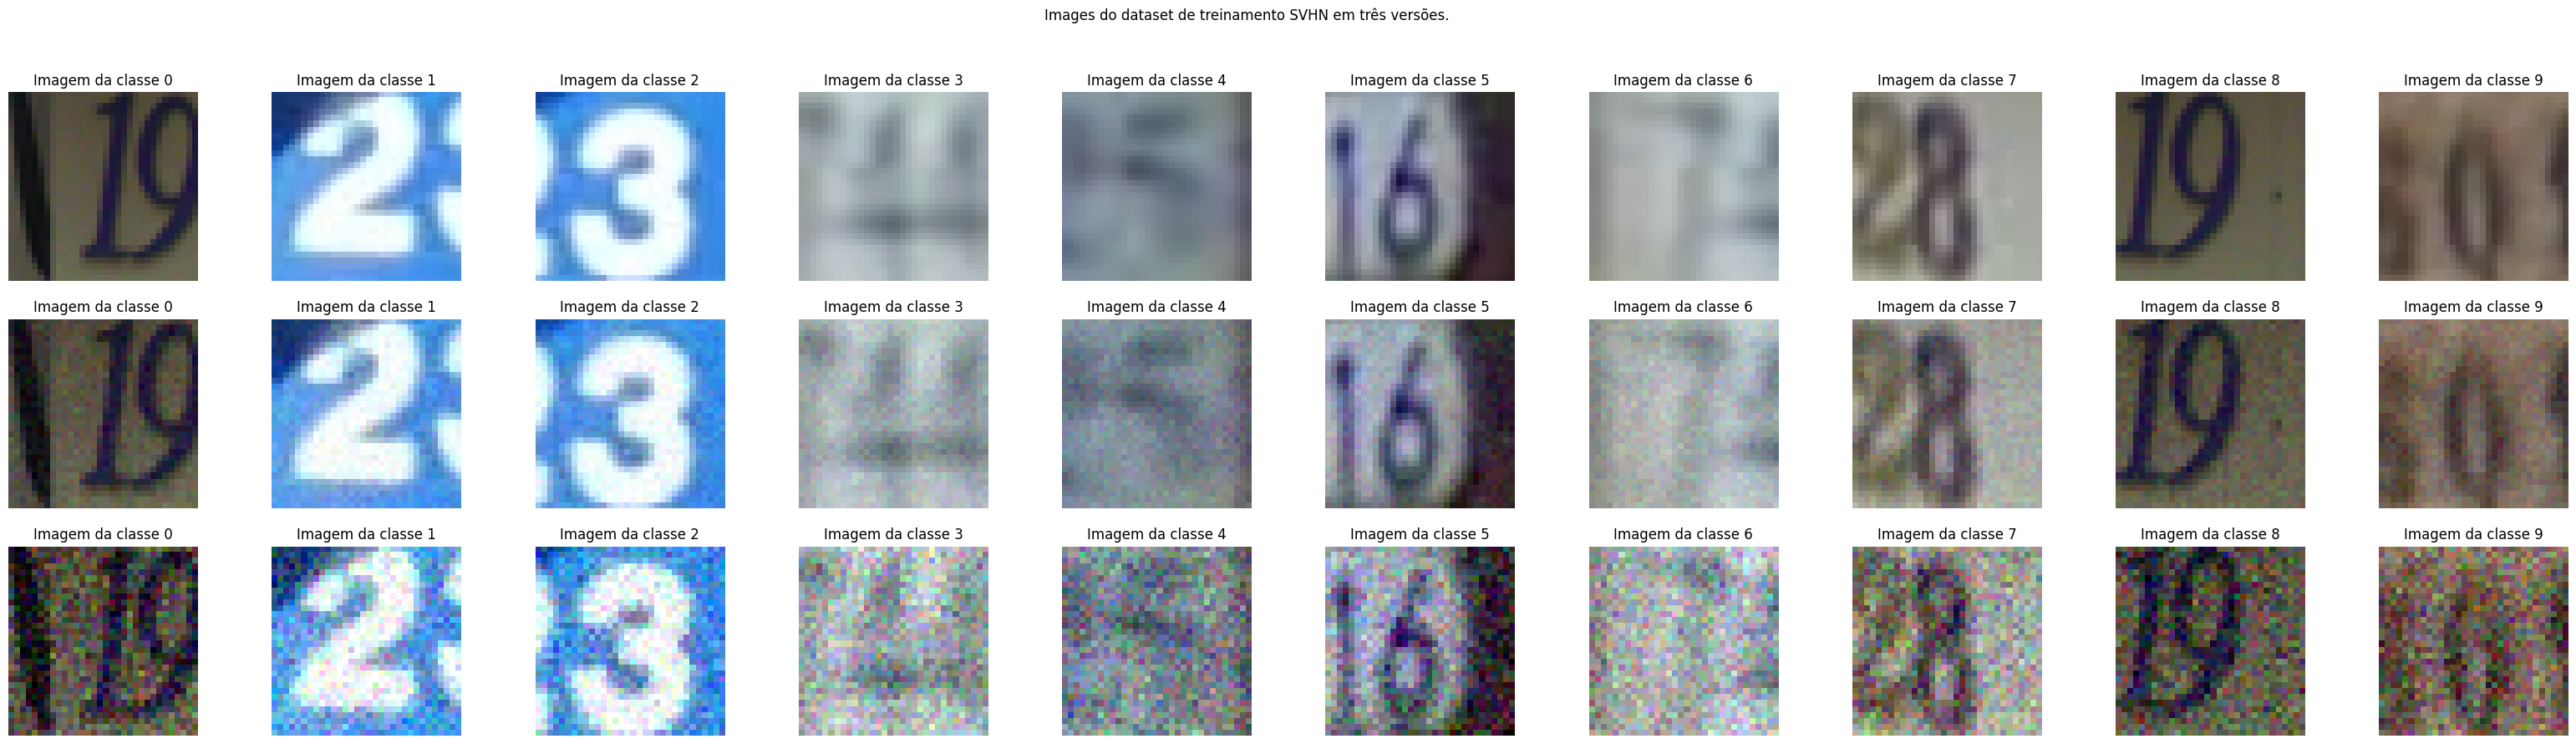

In [29]:
fig, axs = plt.subplots(3, 10, figsize=(40, 10))
fig.suptitle('Images do dataset de treinamento SVHN em três versões.')

print(y_train_SVHN.shape)

for dataset, ax in zip(SVHN_train_datasets, axs):
  images = []
  labels = []
  for i in range(y_train_SVHN.shape[1]):
    looked_image_prob = np.zeros((y_train_SVHN.shape[1]), dtype=np.uint8)
    looked_image_prob[i] = 1
    idx = np.argwhere(np.all(y_train_SVHN == looked_image_prob, axis=1))
    if(idx.shape[0] > 0):
      images.append(dataset[idx[0]])
      labels.append("Imagem da classe {}".format(i))

  pltImagesAxLine(images, ax, labels)

## Question 4

### Train the model for each version of the datasets. Must use Adam as optimizer and 10 epochs

In [46]:
cifar10_models = []
for dataset, idx in zip(cifar10_train_datasets, range(len(cifar10_train_datasets))):
  model_path = path + 'cifarModel{}'.format(idx)
  if(os.path.isdir(model_path)):
    model = tf.keras.models.load_model(model_path)
  else:
    model = createModel()
    model.fit(
        dataset,
        y_train_cifar10,
        epochs=10,
    )
    model.save(model_path)

  cifar10_models.append(model)


In [47]:
SVHN_models = []
for dataset, idx in zip(SVHN_train_datasets, range(len(SVHN_train_datasets))):
  model_path = path + 'SVHNModel{}'.format(idx)
  if(os.path.isdir(model_path)):
    model = tf.keras.models.load_model(model_path)
  else:
    model = createModel()
    model.fit(
        dataset,
        y_train_SVHN,
        epochs=10,
    )
    model.save(model_path)
  SVHN_models.append(model)

## Question 5

### a) Compute the accuracy of the models with the three versions of the test datasets.

In [34]:
cifar10_accuracies = []
SVHN_accuracies = []

for model in cifar10_models:
  model_accuracies = []
  for dataset in cifar10_test_datasets:
    loss, acc = model.evaluate(dataset, y_test_cifar10)
    model_accuracies.append(acc)
  cifar10_accuracies.append(model_accuracies)

for model in SVHN_models:
  model_accuracies = []
  for dataset in SVHN_test_datasets:
    loss, acc = model.evaluate(dataset, y_test_SVHN)
    model_accuracies.append(acc)
  SVHN_accuracies.append(model_accuracies)


814/814 [==============================] - 7s 9ms/step - loss: 0.4454 - accuracy: 0.8677


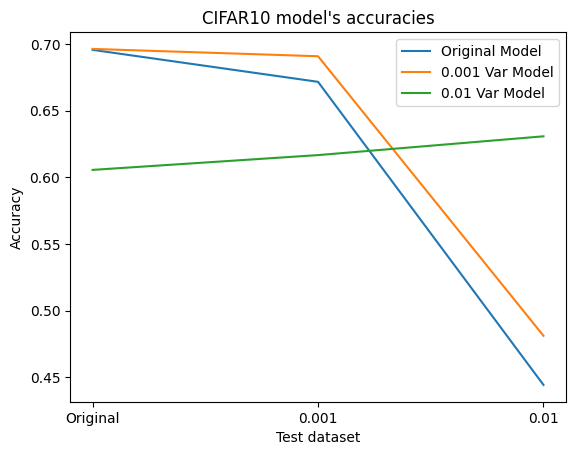

In [54]:
plt.title("CIFAR10 model's accuracies")
plt.xlabel("Test dataset")
plt.ylabel("Accuracy")


for acc, label in zip(cifar10_accuracies, ['Original Model', '0.001 Var Model', '0.01 Var Model']):
  plt.plot(['Original', '0.001', '0.01'], acc, label=label)

plt.legend()

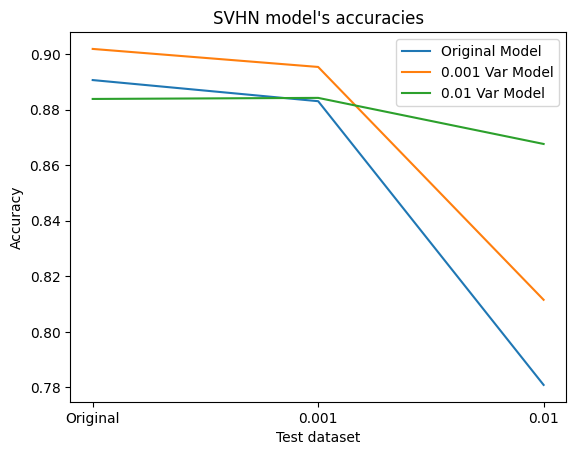

In [55]:
plt.title("SVHN model's accuracies")
plt.xlabel("Test dataset")
plt.ylabel("Accuracy")


for acc, label in zip(SVHN_accuracies, ['Original Model', '0.001 Var Model', '0.01 Var Model']):

  plt.plot(['Original', '0.001', '0.01'], acc, label=label)

plt.legend()

### b) Discuss which of the following steatements explain better the variations of accuracy:

- The noise makes the problem difficult, therefore it is harder to learn with noisy data

- When the model is exposed with data that is very different from those used in the training, its accuracy might drop.

It is pretty clear that the second statement is more accurate as the plots show how the accuracy behaves when the test dataset changes and how the models are similar when exposed to the original test dataset.

On the cifar10 models, the scores were high with the original test dataset for the three models and then dropped with the noisy ones for the first and second models and increased a little for the third.

A similar behavior is observed for the SVHN models, where the accuracies dropped heavily for the first two models and then dropped slightly for the third one.

It is concluded that even for the noisy trained models, they perform better on cleaner data than on noisy data with the same pattern.
